
[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


STD Series: From 0.001 to 1.0
Input range: From -6.0 to 6.0
Generated 2609028 cartesian products in total
    Series1  Series2  Series3  Label
0 -6.000000     -1.0    0.001    0.0
1 -5.823529     -1.0    0.001    0.0
2 -5.647059     -1.0    0.001    0.0
3 -5.470588     -1.0    0.001    0.0
4 -5.294118     -1.0    0.001    0.0


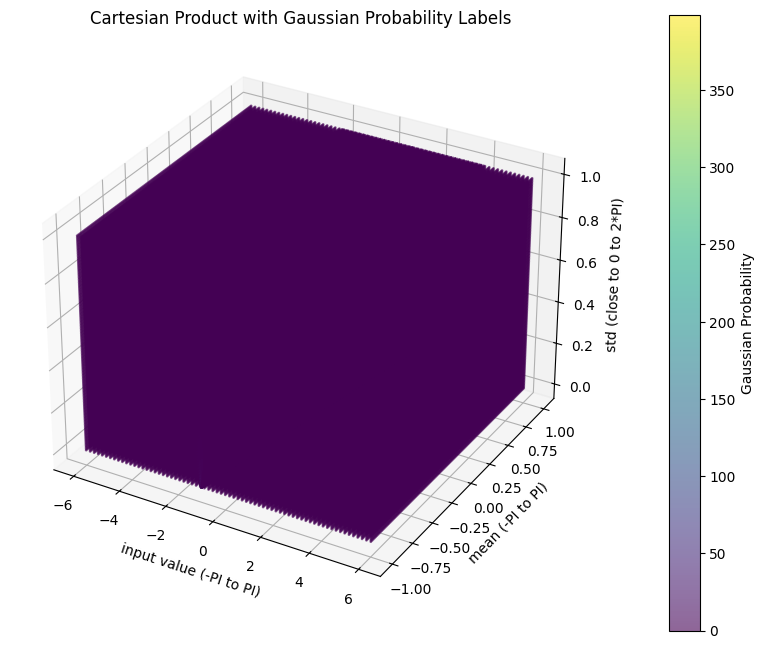

In [1]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 138

# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.001
std = np.linspace(small_number, 1, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-1, 1, num_values)

# We add a minimum input value and maximum input value based on the smallest and highest mean and the maximum std values
min_input = mean.min() - 5 * std.max()
max_input = mean.max() + 5 * std.max()

print(f"Input range: From {min_input} to {max_input}")

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Linearly spaced values from min_input to max_input for 50% of the values
    samples = np.linspace(min_input, max_input, int(num_values * 0.5))
    
    # Add samples with a normal distribution around the mean for the remaining 50% of the values
    normal_samples = [m]
    extra_lin_samples = np.linspace(m - 3 * s, m + 3 * s, int(num_values * 0.49))
    samples = np.concatenate((samples, normal_samples, extra_lin_samples))
    
    inputval.extend(samples)
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()



In [6]:
cartesian_df['Label'] = np.log1p(cartesian_df['Label'])

(array([1.227916e+06, 1.458440e+05, 9.958200e+04, 7.789000e+04,
        6.768200e+04, 6.070800e+04, 5.628400e+04, 5.426200e+04,
        5.350400e+04, 5.456600e+04, 5.840600e+04, 7.061200e+04,
        5.988400e+04, 4.943000e+04, 4.352800e+04, 3.569600e+04,
        3.129000e+04, 2.784400e+04, 2.376600e+04, 2.178000e+04,
        2.017000e+04, 1.672200e+04, 1.498600e+04, 1.579800e+04,
        1.279200e+04, 1.090600e+04, 1.134200e+04, 1.034600e+04,
        8.584000e+03, 8.500000e+03, 7.848000e+03, 7.794000e+03,
        5.766000e+03, 7.396000e+03, 5.656000e+03, 5.372000e+03,
        5.330000e+03, 5.004000e+03, 4.148000e+03, 3.572000e+03,
        5.480000e+03, 3.528000e+03, 3.786000e+03, 3.498000e+03,
        3.182000e+03, 2.072000e+03, 4.272000e+03, 2.348000e+03,
        2.856000e+03, 2.594000e+03, 2.296000e+03, 2.284000e+03,
        2.298000e+03, 1.996000e+03, 2.014000e+03, 1.700000e+03,
        2.556000e+03, 1.692000e+03, 1.150000e+03, 1.704000e+03,
        1.414000e+03, 2.256000e+03, 8.52

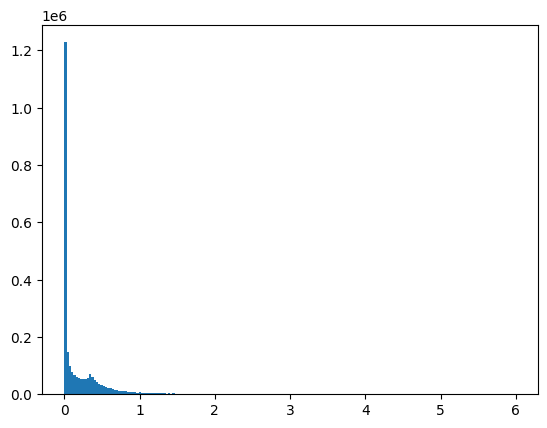

In [7]:
# plot label distribution
plt.hist(cartesian_df['Label'], bins=200)


In [8]:
# Load test dataset
test_df = pd.read_csv('../extraextra_lin_unchangedinp_log1p_test_data.csv')

# Load train dataset
train_df = pd.read_csv('../extraextra_lin_unchangedinp_log1p_train_data.csv')

(array([9.4186e+04, 1.1066e+04, 7.5150e+03, 5.9120e+03, 5.0600e+03,
        4.6230e+03, 4.3110e+03, 4.0430e+03, 4.0690e+03, 4.0490e+03,
        4.4990e+03, 5.4430e+03, 4.5630e+03, 3.8100e+03, 3.3560e+03,
        2.9230e+03, 2.3780e+03, 2.1100e+03, 1.8400e+03, 1.7310e+03,
        1.4820e+03, 1.2690e+03, 1.1630e+03, 1.2140e+03, 9.2000e+02,
        1.0420e+03, 7.8800e+02, 7.9700e+02, 5.9000e+02, 6.5600e+02,
        7.4300e+02, 5.4200e+02, 4.5400e+02, 5.2300e+02, 4.4100e+02,
        4.4600e+02, 3.3500e+02, 4.6300e+02, 4.0000e+02, 4.1700e+02,
        9.9000e+01, 4.0300e+02, 3.3100e+02, 2.6500e+02, 1.6300e+02,
        3.3600e+02, 2.0600e+02, 1.3900e+02, 2.9000e+02, 2.1800e+02,
        1.8800e+02, 1.2500e+02, 2.0900e+02, 1.2200e+02, 1.7700e+02,
        2.2200e+02, 1.3700e+02, 9.2000e+01, 1.3900e+02, 2.4200e+02,
        7.9000e+01, 1.3300e+02, 8.7000e+01, 3.9000e+01, 1.0800e+02,
        1.0700e+02, 1.6900e+02, 8.6000e+01, 1.0500e+02, 4.0000e+00,
        1.1300e+02, 4.1000e+01, 1.5000e+02, 4.00

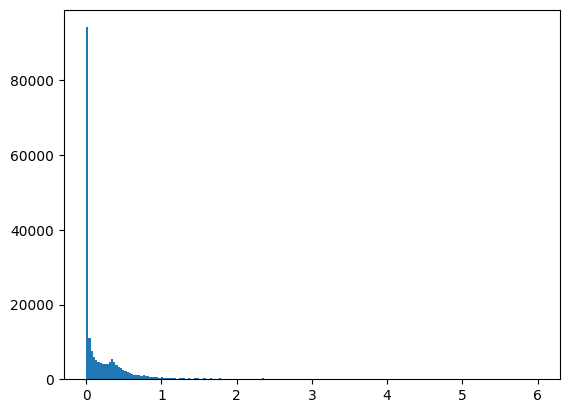

In [9]:
plt.hist(test_df['Label'], bins=200)

In [15]:
# Check for duplicates between cartesian_df and test_df
duplicates = cartesian_df.merge(test_df, how='inner')
print(f"Number of duplicates: {len(duplicates)}")
duplicates

Number of duplicates: 12


,Series1,Series2,Series3,Label
0,-1.003,-1.0,0.001,1.692279
1,-1.000,-1.0,1.000,0.335716
2,-1.000,-1.0,1.000,0.335716
3,-1.000,-1.0,1.000,0.335716
4,-1.000,-1.0,1.000,0.335716
5,1.000,1.0,0.001,5.991320
6,0.997,1.0,0.001,1.692279
7,0.998,1.0,0.001,4.007169
8,1.000,1.0,0.001,5.991320
9,1.002,1.0,0.001,4.007169


In [16]:
# drop duplicates existing in both cartesian_df and test_df
cartesian_df = cartesian_df[~cartesian_df.isin(duplicates)].dropna()
len(cartesian_df)

2609017

In [18]:
duplicates_train = cartesian_df.merge(train_df, how='inner')
print(f"Number of duplicates: {len(duplicates_train)}")
print(duplicates_train)

# drop duplicates existing in both cartesian_df and train_df
cartesian_df = cartesian_df[~cartesian_df.isin(duplicates_train)].dropna()
len(cartesian_df)

Number of duplicates: 21
    Series1  Series2  Series3     Label
0     6.000     -1.0    0.001  0.000000
1    -1.000     -1.0    0.001  5.991320
2    -1.000     -1.0    0.001  5.991320
3    -1.002     -1.0    0.001  4.007169
4    -1.001     -1.0    0.001  5.492941
5    -1.000     -1.0    0.001  5.991320
6    -1.000     -1.0    0.001  5.991320
7    -0.999     -1.0    0.001  5.492941
8    -0.998     -1.0    0.001  4.007169
9    -0.997     -1.0    0.001  1.692279
10   -6.000     -1.0    1.000  0.000001
11   -6.000      1.0    0.001  0.000000
12    6.000      1.0    0.001  0.000000
13    1.000      1.0    0.001  5.991320
14    0.999      1.0    0.001  5.492941
15    1.000      1.0    0.001  5.991320
16    1.001      1.0    0.001  5.492941
17    1.003      1.0    0.001  1.692279
18    6.000      1.0    1.000  0.000001
19    1.000      1.0    1.000  0.335716
20    1.000      1.0    1.000  0.335716


2609010

In [19]:
test_df.describe()

,Series1,Series2,Series3,Label
count,200000.000000,200000.000000,200000.000000,2.000000e+05
mean,0.008634,-0.000454,0.499820,2.515965e-01
std,2.632026,0.583183,0.291513,5.147689e-01
min,-6.000000,-1.000000,0.001000,0.000000e+00
25%,-1.346939,-0.515152,0.243182,3.799229e-09
50%,0.009896,0.010101,0.495455,4.375688e-02
75%,1.348729,0.494949,0.747727,3.334947e-01
max,6.000000,1.000000,1.000000,5.991320e+00


In [20]:
cartesian_df.describe()

,Series1,Series2,Series3,Label
count,2.609010e+06,2.609010e+06,2.609010e+06,2.609010e+06
mean,3.104626e-05,6.899169e-06,5.005034e-01,2.454215e-01
std,2.625935e+00,5.815454e-01,2.904819e-01,4.913291e-01
min,-6.000000e+00,-1.000000e+00,1.000000e-03,0.000000e+00
25%,-1.411765e+00,-5.036496e-01,2.489270e-01,3.883332e-09
50%,0.000000e+00,7.299270e-03,5.041460e-01,4.385371e-02
75%,1.411765e+00,5.036496e-01,7.520730e-01,3.296664e-01
max,6.000000e+00,1.000000e+00,1.000000e+00,5.991320e+00


In [21]:
# Seems fine, no post processing needed
# Eval function
from torcheval.metrics import R2Score
from tqdm import tqdm
import torch
import torch.nn.functional as F

def do_epoch(loader, model, device, n_epochs: int, current_epoch: int):
    model.eval()
    epoch_loss = 0
    metric = R2Score(device=device)
    for inputvals, means, stds, labels in tqdm(loader, desc=f"{'Eval Epoch'} {current_epoch+1}/{n_epochs}"):
        inputs = torch.stack((inputvals, means, stds), dim=1).float()
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        metric.update(outputs.squeeze(), labels)
        loss = F.mse_loss(outputs.squeeze(), labels.float())
        epoch_loss += loss.item()
    return epoch_loss, metric.compute()

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [23]:
# build and load NN model
import torch.nn as nn

def load_model(hidden_layer_size: int, device: str, path_state_dict: str):
    ann = nn.Sequential()
    ann.add_module('0', nn.Linear(3, hidden_layer_size))
    ann.add_module('relu1', nn.ReLU())
    ann.add_module('2', nn.Linear(hidden_layer_size, hidden_layer_size))
    ann.add_module('relu2', nn.ReLU())
    ann.add_module('4', nn.Linear(hidden_layer_size, hidden_layer_size))
    ann.add_module('relu3', nn.ReLU())
    ann.add_module('6', nn.Linear(hidden_layer_size, 1))
    
    ann.load_state_dict(torch.load(path_state_dict))
    
    ann.to(device)
    return ann

In [24]:
# Find all result model paths
import os
model_paths = [("SGD", f"../results/extraextra_lin_256_2HL_log1p_sgd/ann_epoch_550.pth"), ("AdamW", f"../results/extraextra_lin_256_2HL_log1p/ann_epoch_550.pth")]
model_paths


[('SGD', '../results/extraextra_lin_256_2HL_log1p_sgd/ann_epoch_550.pth'),
 ('AdamW', '../results/extraextra_lin_256_2HL_log1p/ann_epoch_550.pth')]

In [28]:
models = [("SGD", load_model(256, device, model_paths[0][1])), ("AdamW", load_model(256, device, model_paths[1][1]))]
models

C:\Users\Lutz\AppData\Local\Temp\ipykernel_14920\3859272859.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ann.load_state_dict(torch.load(path_state_dict))


[('SGD',
  Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (relu1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (relu2): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (relu3): ReLU()
    (6): Linear(in_features=256, out_features=1, bias=True)
  )),
 ('AdamW',
  Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (relu1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (relu2): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (relu3): ReLU()
    (6): Linear(in_features=256, out_features=1, bias=True)
  ))]

In [29]:
from torch.utils.data import Dataset, DataLoader

class DataFrameDataset(Dataset):
    def __init__(self, dataframe):
        self.inputval = dataframe["Series1"]
        self.mean = dataframe["Series2"]
        self.std = dataframe["Series3"]
        self.labels = dataframe["Label"]

    def __len__(self):
        return len(self.inputval)

    def __getitem__(self, idx):
        inputval = self.inputval.iloc[idx]
        mean = self.mean.iloc[idx]
        std = self.std.iloc[idx]
        labels = self.labels.iloc[idx]
        return inputval, mean, std, labels
    
test_loader = DataLoader(DataFrameDataset(test_df), batch_size=64, shuffle=True)
train_loader = DataLoader(DataFrameDataset(train_df), batch_size=64, shuffle=True)
eval_loader = DataLoader(DataFrameDataset(cartesian_df), batch_size=64, shuffle=True)
    

In [30]:
result = []

for optim_name, model in models:
    print(model)
    eval_loss, eval_R2 = do_epoch(eval_loader, model, device, 1, 0)
    test_loss, test_R2 = do_epoch(test_loader, model, device, 1, 0)
    train_loss, train_R2 = do_epoch(train_loader, model, device, 1, 0)
    
    eval_loss /= len(eval_loader)
    test_loss /= len(test_loader)
    train_loss /= len(train_loader)
    
    print(f"Eval Loss: {eval_loss}, Eval R2: {float(eval_R2)}")
    print(f"Test Loss: {test_loss}, Test R2: {test_R2}")
    
    result.append((optim_name, eval_loss, float(eval_R2), test_loss, float(test_R2), train_loss, float(train_R2)))

Sequential(
  (0): Linear(in_features=3, out_features=256, bias=True)
  (relu1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (relu2): ReLU()
  (4): Linear(in_features=256, out_features=256, bias=True)
  (relu3): ReLU()
  (6): Linear(in_features=256, out_features=1, bias=True)
)


Eval Epoch 1/1:   0%|          | 0/40766 [00:00<?, ?it/s]

Eval Epoch 1/1: 100%|██████████| 12500/12500 [00:17<00:00, 710.20it/s]


Eval Loss: 0.004653083607206067, Eval R2: 0.980724573135376
Test Loss: 0.006250770770442686, Test R2: 0.9764108657836914
Sequential(
  (0): Linear(in_features=3, out_features=256, bias=True)
  (relu1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (relu2): ReLU()
  (4): Linear(in_features=256, out_features=256, bias=True)
  (relu3): ReLU()
  (6): Linear(in_features=256, out_features=1, bias=True)
)


Eval Epoch 1/1: 100%|██████████| 12500/12500 [00:17<00:00, 706.45it/s]

Eval Loss: 7.654291756780833e-05, Eval R2: 0.9996829628944397
Test Loss: 1.1167240645054334e-05, Test R2: 0.9999578595161438


In [31]:
result

[('SGD',
  0.004653083607206067,
  0.980724573135376,
  0.006250770770442686,
  0.9764108657836914,
  0.006196348117064081,
  0.9764711856842041),
 ('AdamW',
  7.654291756780833e-05,
  0.9996829628944397,
  1.1167240645054334e-05,
  0.9999578595161438,
  4.961336264029797e-06,
  0.999981164932251)]

In [32]:
result_df = pd.DataFrame(result, columns=["Optim Name", "Eval Loss", "Eval R2", "Test Loss", "Test R2", "Train Loss", "Train R2"])

In [33]:
result_df

,Optim Name,Eval Loss,Eval R2,Test Loss,Test R2,Train Loss,Train R2
0,SGD,0.004653,0.980725,0.006251,0.976411,0.006196,0.976471
1,AdamW,0.000077,0.999683,0.000011,0.999958,0.000005,0.999981
